In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import sympy as sp 
from scipy.interpolate import *
import scipy.integrate as integrate_sc


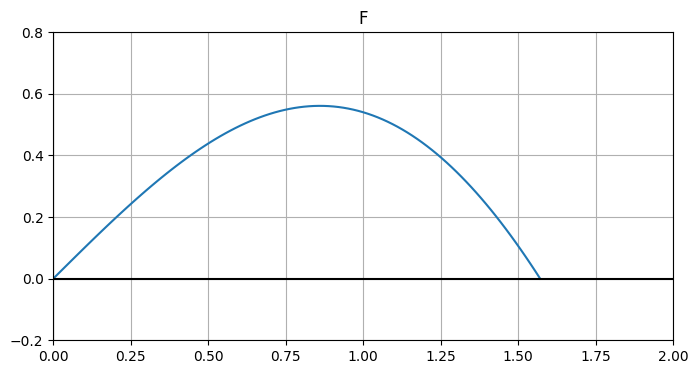

Integral = 0.5707963323843156 =
     π
-1 + ─
     2


In [18]:
# УПРАЖНЕНИЕ 1
x = np.linspace(0, np.pi/2, 100)
y = x * np.cos(x)

plt.figure(figsize=(8,4))

plt.plot(x,y)
plt.grid(True)
plt.axis([0,2,-0.2,0.8])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.title("F")

plt.show()

print(f"Integral = {integrate_sc.simpson(y,x)} =")
x = sp.symbols('x')
sp.pprint(sp.integrate(x*sp.cos(x), (x, 0, sp.pi/2)))

Area in between = 36.767826813728576


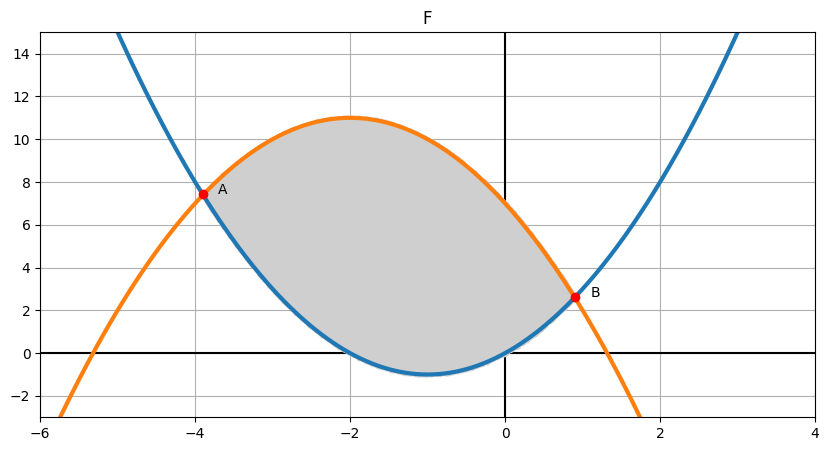

In [7]:
# УПРАЖНЕНИЕ 2
plt.figure(figsize=(10,5))
plt.grid(True)
plt.axis([-6,4,-3,15])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.title("F")

x = np.linspace(-12,12,1000)
y1 = x**2 + 2*x
y2 = 7 - 4*x - x**2
y = y2 - y1
zeros = np.where(np.abs(y) < 0.1)[0]
Labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
id = 0
a,b = x[zeros]

x = b - (b-a)*np.random.rand(100_000)
y = 11 - 12*np.random.rand(100_000)

L1 = (y < 7 - 4*x - x**2)
L2 = (y > x**2 + 2*x)
L = L1 & L2
plt.plot(x[L], y[L], '.', color='#cfcfcf')

x = np.linspace(-12,12,1000)
y1 = x**2 + 2*x
y2 = 7 - 4*x - x**2
plt.plot(x,y1, linewidth=3)
plt.plot(x,y2, linewidth=3)

for point in zeros:
    plt.plot(x[point], y1[point], 'o', color="red", label=Labels[id])
    plt.text(x[point] + 0.2, y1[point], Labels[id])
    id+=1

x = np.linspace(a,b,1000)
y1 = x**2 + 2*x
y2 = 7 - 4*x - x**2
S = integrate_sc.simpson(y2 - y1,x)

print(f"Area in between = {S}")

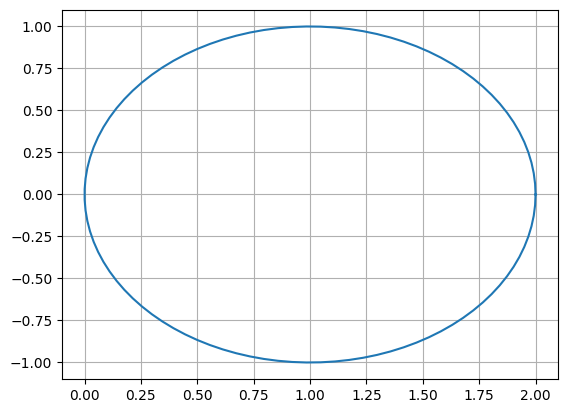

In [54]:
# Вычисление прощади фигуры, ограниченной кривой, заданной параметрически
'''
Фигура ограничена прямыми x = a, x = b, y = 0 и графиком параметрически заданной функции:
{ y = y(t)
{ x = x(t)
a = x(t_1), b = x(t_2)

y >= 0 на [t_1, t_2]

S = integral( [t_1 -> t_2] | y(t) * x'(t) dt )
t: t_1 -> t_2 - обход контура по часовой стрелке
'''
# Пример
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t) + 1
y = np.sin(t)
plt.plot(x,y)
plt.grid()


In [60]:
# УПРАЖНЕНИЕ 3

# a
t = np.linspace(0, 2*np.pi, 1000)
x = np.cos(t)
y = np.sin(t)
dx_dt = np.gradient(x,t)
S = integrate_sc.simpson( y*dx_dt,-t)
print(S)

# б
t = np.linspace(0, 2*np.pi, 1000)
x = 2 * np.cos(t)
y = 3 * np.sin(t)
dx_dt = np.gradient(x,t)
S = integrate_sc.simpson(y * dx_dt, -t)
print(S)

3.141571941379122
18.849431648274734


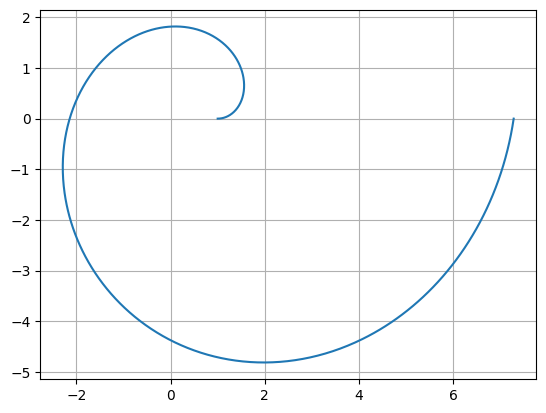

In [62]:
# Вычисление площади фигуры, ограниченной кривой, заданной уравнением в полярных координатах
'''
phi = [alpha, betta]
r = r(phi) >= 0

S = 1/2 integral( [alpha, betta] | r^2 (phi) d(phi) )
'''
# Пример
t = np.linspace(0, 2*np.pi, 1000)
r = t
x = r*np.cos(t) + 1
y = r*np.sin(t)
plt.plot(x,y)
plt.grid()

71687.57836798404
71687.57828416329


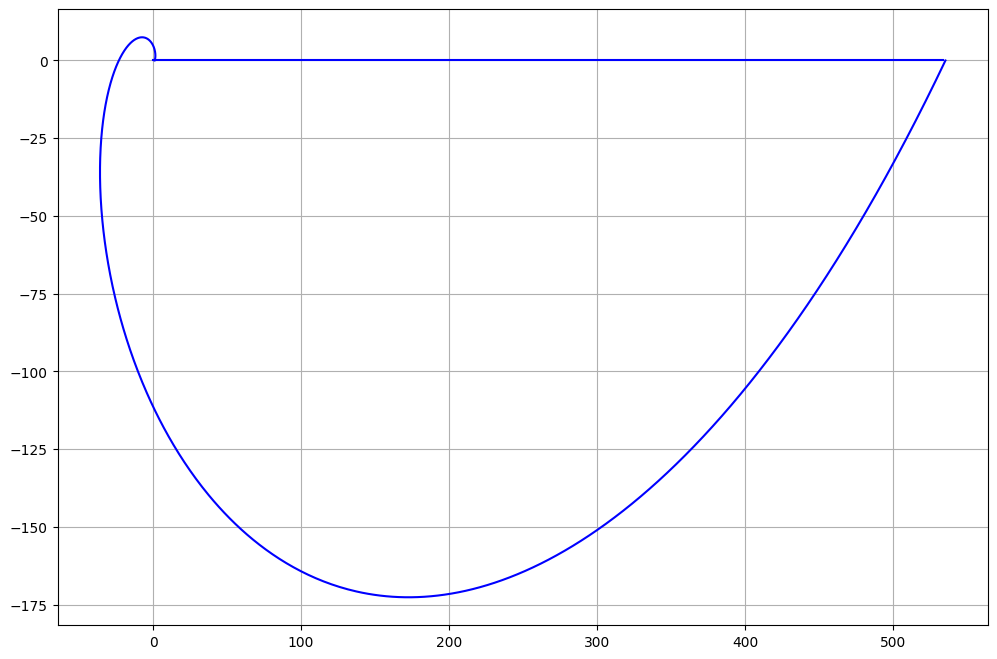

In [76]:
# УПРАЖНЕНИЕ 4

phi = np.linspace(0, 2*np.pi, 1000)
r = np.exp(phi)
x = r*np.cos(phi)
y = r*np.sin(phi)

plt.figure(figsize=(12,8))

plt.plot(x,y, color="blue")
plt.grid()
plt.plot(phi*85, 0*phi, color="blue")

S = integrate_sc.simpson(r**2, phi)/2
print(S)
#print(0.25 * (np.exp(4 * np.pi) - 1))

In [77]:
# Вычисление длины дуги
'''
y = y(x), x in [a,b]
y(x) - непрерывна и дифференцируема на [a,b]

L = integral( [a,b] | sqrt( 1 + (y')^2 ) dx)
'''

"\ny = y(x), x in [a,b]\ny(x) - непрерывна и дифференцируема на [a,b]\n\nL = integral( [a,b] | sqrt( 1 + (y')^2 ) dx)\n"

In [87]:
# УПРАЖНЕНИЕ 5
x = np.linspace(1,2, 100)
y = x**2
dy_dx = np.gradient(y,x)
print( integrate_sc.simpson( np.sqrt(1 + dy_dx**2), x))

############ TEST
print("\n\n\n")
x = np.linspace(0,1, 1000000)
y = np.sqrt(1 - x**2)
dy_dx = np.gradient(y,x)
print( integrate_sc.simpson( np.sqrt(1 + dy_dx**2), x)*2)
print(f"Pi = {np.pi}")


3.167830099512602




3.1414659397732545
Pi = 3.141592653589793


In [88]:
# Длина дуги, заданной параметрически
'''
y = y(t), x = x(t)
t in [t_1, t_2]

y'^2 + x'^2 != 0 for all t

L = integral( [t_1, t_2] | sqrt( x'^2 + y'^2 ) dt)
'''

"\ny = y(t), x = x(t)\nt in [t_1, t_2]\n\ny'^2 + x'^2 != 0 for all t\n\nL = integral( [t_1, t_2] | sqrt( x'^2 + y'^2 ) dt)\n"

In [89]:
# УПРАЖНЕНИЕ 6
t = np.linspace(0, 2 * np.pi, 1000)
x = 2 * np.cos(t)
y = 3 * np.sin(t)
dx_dt = np.gradient(x,t)
dy_dt = np.gradient(y,t)
print(integrate_sc.simpson(np.sqrt( dx_dt**2 + dy_dt**2), t))

15.865335021092658


In [90]:
# Длина дуги в полярных координатах
# L = integral( [alpha, betta] | sqrt( r^2  + r'^2) dt)

31.999942908196324


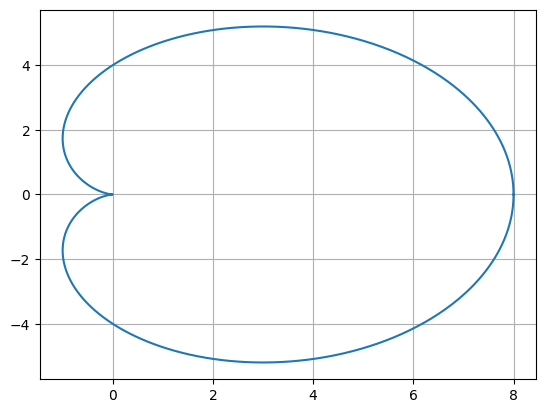

In [93]:
# УПРАЖНЕНИЕ 7
phi = np.linspace(0, 2*np.pi, 1000)
r = 4 * ( 1 + np.cos(phi))
dr_dphi = np.gradient(r,t)
plt.plot(r*np.cos(phi), r*np.sin(phi))
plt.grid()
L = integrate_sc.simpson(np.sqrt(r**2 + dr_dphi**2), phi)
print(L)

In [1]:
# Вычисление объема тела вращения
'''
Объём тела, образованного вращением вокруг оси Ox криволинейной трапеции

Vx = pi * integral( [a,b] | y^2 dx )
-------------------------------------------------------------------------
Объём тела, образованного вращением вокруг оси Oy криволинейной трапеции

Vy = 2*pi * integral( [a,b] | x*y dx )
'''

'\nОбъём тела, образованного вращением вокруг оси Ox криволинейной трапеции\n\nV = pi * integral( [a,b] | y^2 dx )\n-------------------------------------------------------------------------\nОбъём тела, образованного вращением вокруг оси Oy криволинейной трапеции\n\nV = 2*pi * integral( [a,b] | x*y dx )\n'

Volume relative to Ox = 4.934802200545001
Volume relative to Oy = 19.739208802269555


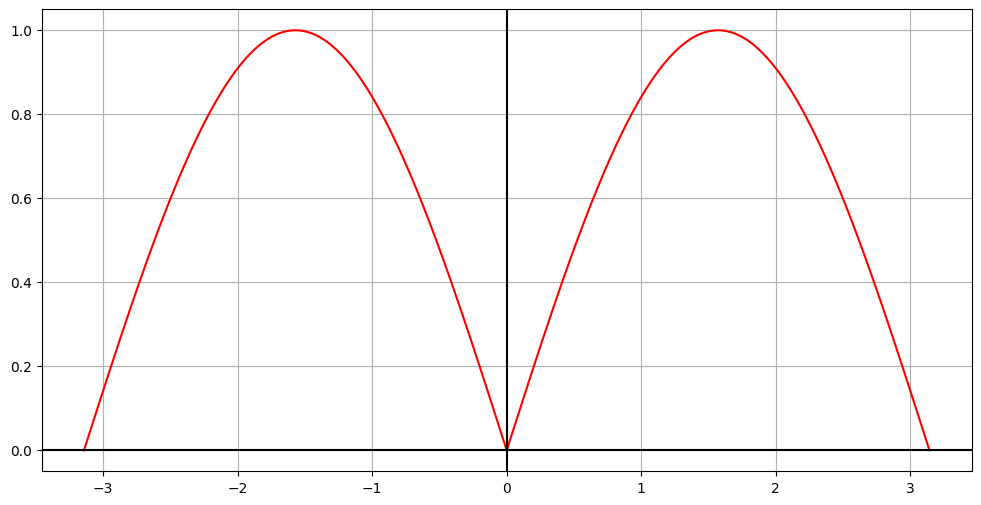

In [10]:
# УПРАЖНЕНИЕ 8
x = np.linspace(0, np.pi, 1000)
y = np.sin(x)
plt.figure(figsize=(12,6))
plt.plot(x,y, color="red")
plt.plot(-x,y, color="red")
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
print(f"Volume relative to Ox = {    np.pi * integrate_sc.simpson(y**2, x)}")
print(f"Volume relative to Oy = {2 * np.pi * integrate_sc.simpson(x * y,x)}")

9.434208677571853
-0.786184347745194 0.7861843477451934


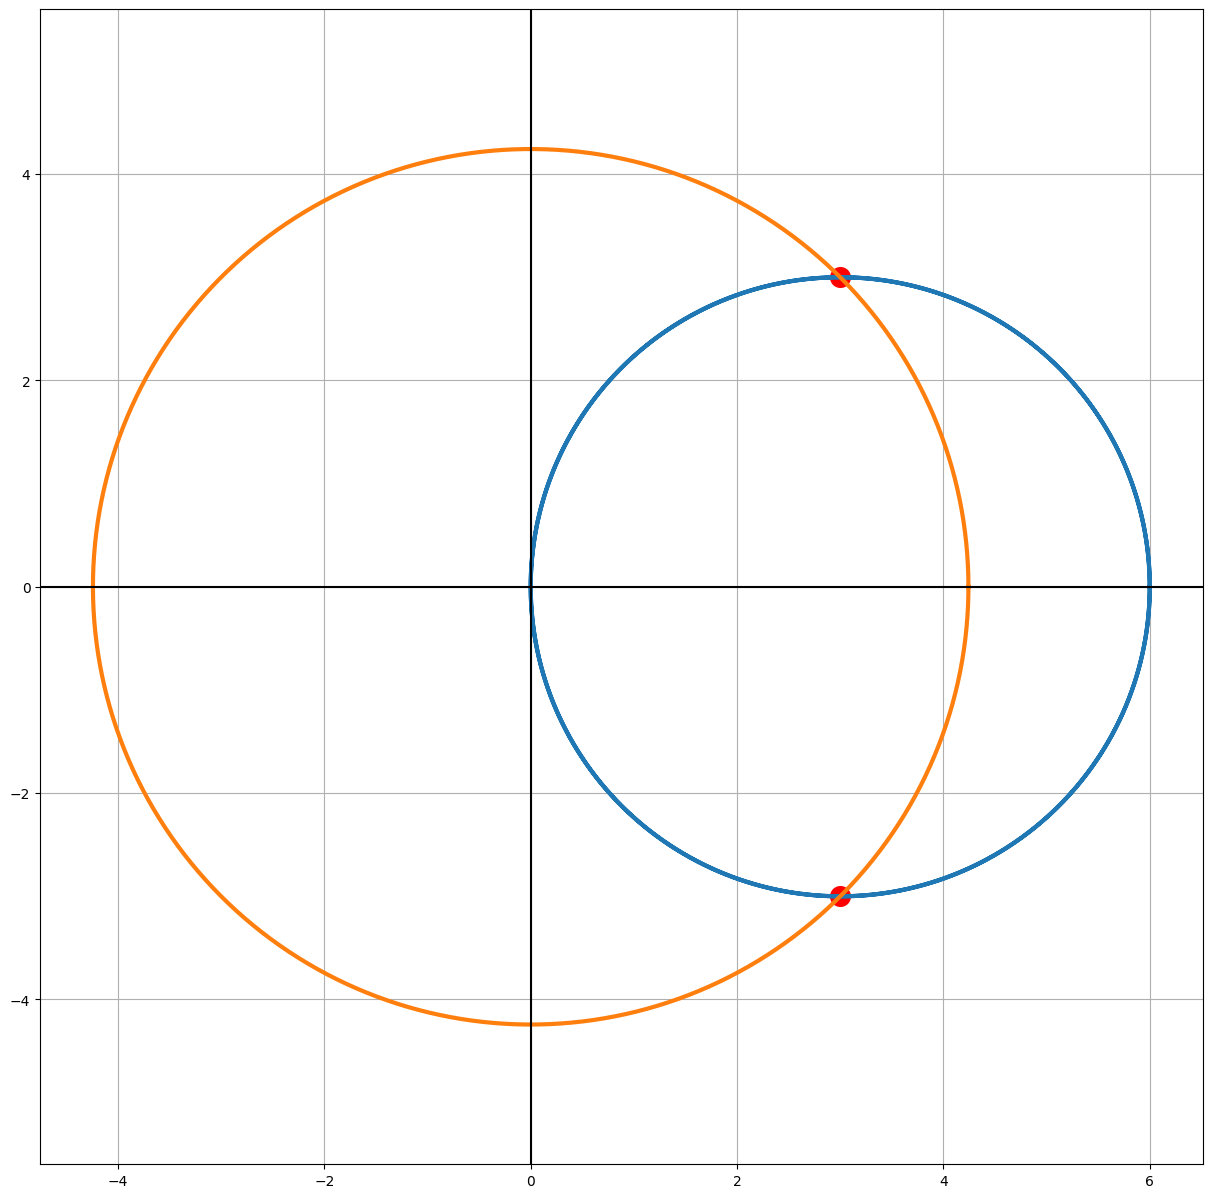

In [3]:
# ИНДИВИДУАЛЬНОЕ ЗАДАНИЕ 1, ВАРИАНТ 4
phi = np.linspace(0, 2*np.pi, 1000)
r = 6*np.cos(phi)
ro = 3*np.sqrt(2)
x = np.cos(phi)
y = np.sin(phi)
xs = (np.abs((r - ro)*x) < 0.01)
ys = (np.abs((r - ro)*y) < 0.01)
id = xs & ys

plt.figure(figsize=(15,15))
plt.plot(r  * x, r  * y, linewidth=3)
plt.plot(ro * x, ro * y, linewidth=3)
plt.scatter((r*x)[id], (r*y)[id], s = 200, color="red")
plt.grid()
plt.axis("equal")
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")

# L = integral( [alpha, betta] | sqrt( r^2  + r'^2) dt)
a, b = phi[id]
b -= 2*np.pi
a,b = b,a
phi = np.linspace(a, b, 1000)
r = 6*np.cos(phi)
dr_dphi = np.gradient(r, phi)
print(integrate_sc.simpson(np.sqrt( r**2 + dr_dphi**2), phi))

In [59]:
# ИНДИВИДУАЛЬНОЕ ЗАДАНИЕ 2, ВАРИАНТ 4
x = np.linspace(0,8,1000)
y = np.cbrt(x)
#Vx = pi * integral( [a,b] | y^2 dx )
#Vy = 2*pi * integral( [a,b] | x*y dx )
print(f"Vx = {    np.pi * integrate_sc.simpson( y**2, x)}")
print(f"Vy = {2 * np.pi * integrate_sc.simpson(x * y, x)}")

Vx = 60.31853596125242
Vy = 344.6775951130443


Area is equal = 0.8333333333333333


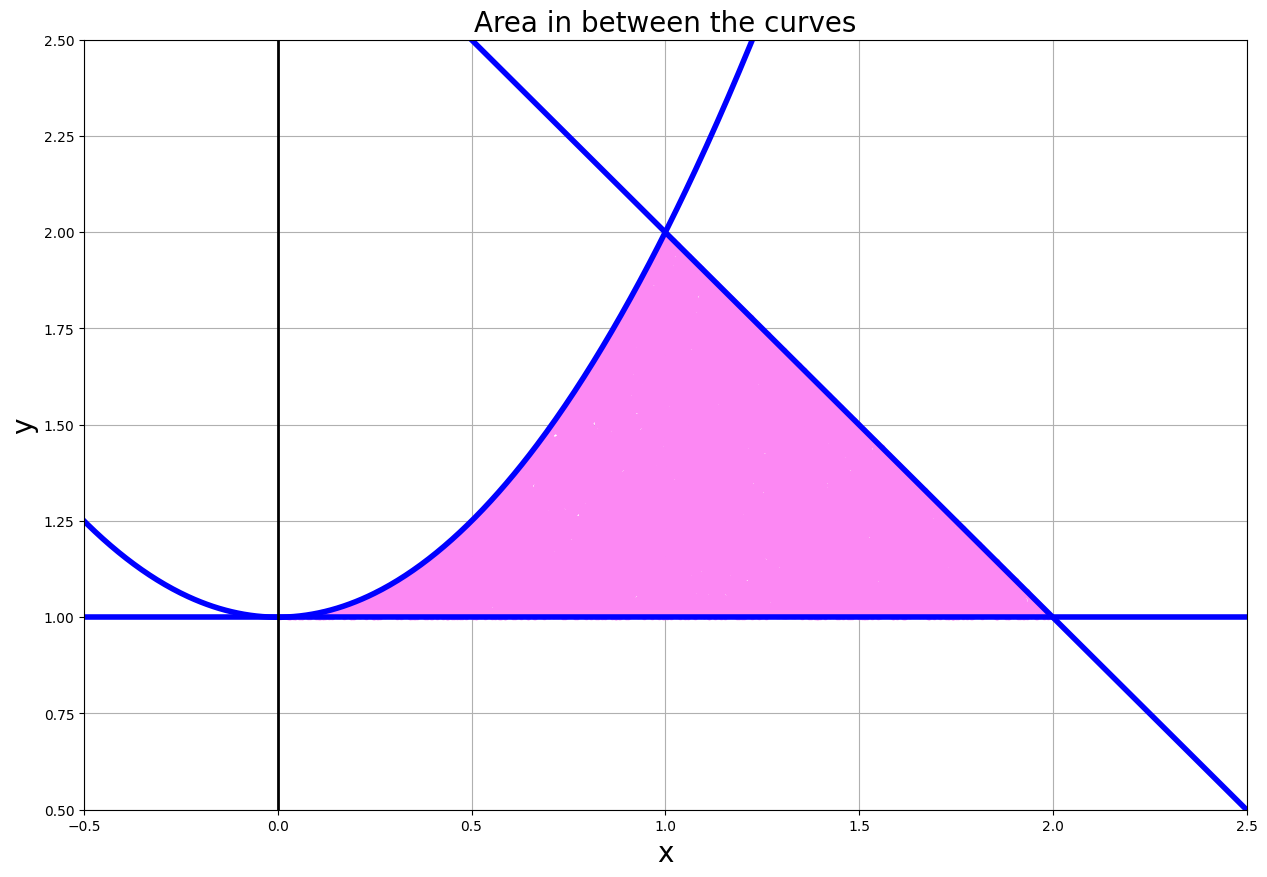

In [8]:
# Часть C
# УПРАЖНЕНИЕ 1С
plt.figure(figsize=(15,10))

x = 2 - 2*np.random.rand(100_000)
y = 2 - 1*np.random.rand(100_000)

L1 = (y < x**2 + 1)
L2 = (y < 3 - x)
L3 = (y > 1)
L = L1 & L2 & L3
plt.plot(x[L], y[L], '.', color='#fc88f3')

x = np.linspace(-1,3,1000)
y1 = x**2 + 1
y2 = 3 - x
y3 = 1 + x*0

plt.plot(x,y1, linewidth=4, color="blue")
plt.plot(x,y2, linewidth=4, color="blue")
plt.plot(x,y3, linewidth=4, color="blue")
plt.grid()
plt.axis([-0.5,2.5, 0.5, 2.5])
plt.axhline(y=0, color="k", linewidth=2)
plt.axvline(x=0, color="k", linewidth=2)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.title("Area in between the curves", fontsize=20)

S = 0
x = np.linspace(0,1,1000)
y1 = x**2 + 1
y3 = 1 + x*0
S += integrate_sc.simpson(y1 - y3, x)
x = np.linspace(1,2,1000)
y2 = 3 - x
y3 = 1 + x*0
S += integrate_sc.simpson(y2 - y3, x)
print(f"Area is equal = {S}")

Text(0, 0.5, 'y')

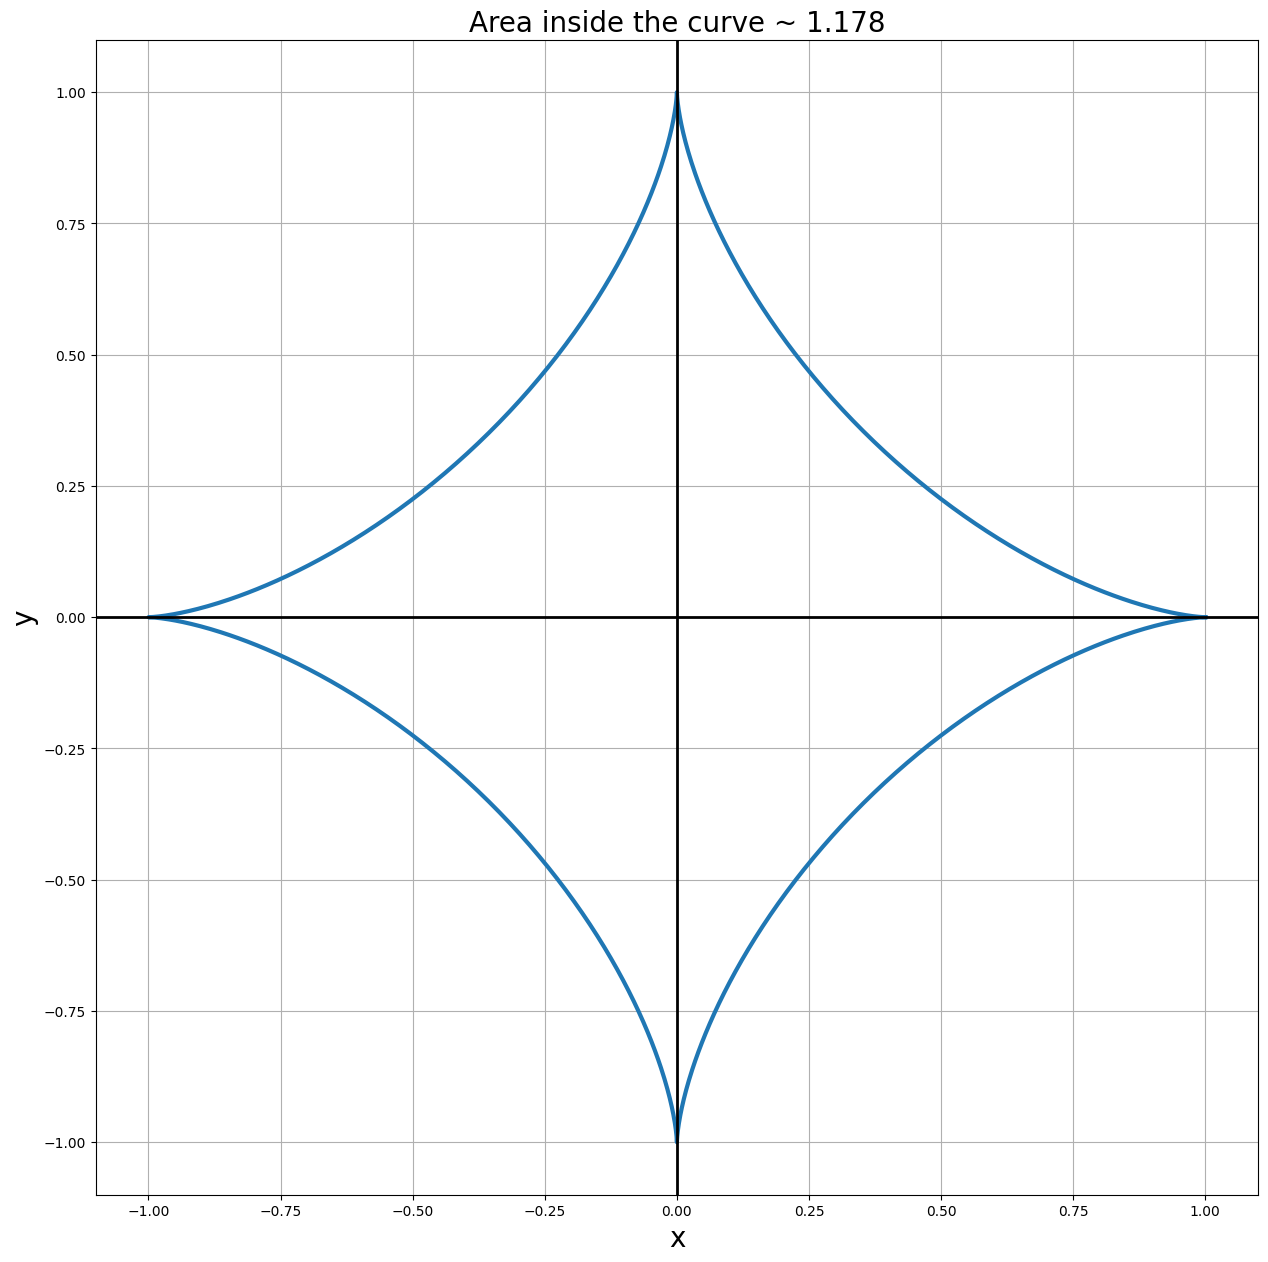

In [108]:
# УПРАЖНЕНИЕ 2С
t = np.linspace(0, 2*np.pi, 1000)
x = (np.cos(t))**3
y = (np.sin(t))**3
dx_dt = np.gradient(x,t)
S = integrate_sc.simpson(y * dx_dt, -t)

plt.figure(figsize=(15,15))
plt.plot(x,y, linewidth=3)
plt.grid()
plt.axhline(y=0, color="k", linewidth=2)
plt.axvline(x=0, color="k", linewidth=2)
plt.title(f"Area inside the curve ~ {S:.3f}", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)

# S = integral( [t_1 -> t_2] | y(t) * x'(t) dt )

Text(0.5, 1.0, 'Area inside the curves = $0.75*pi$')

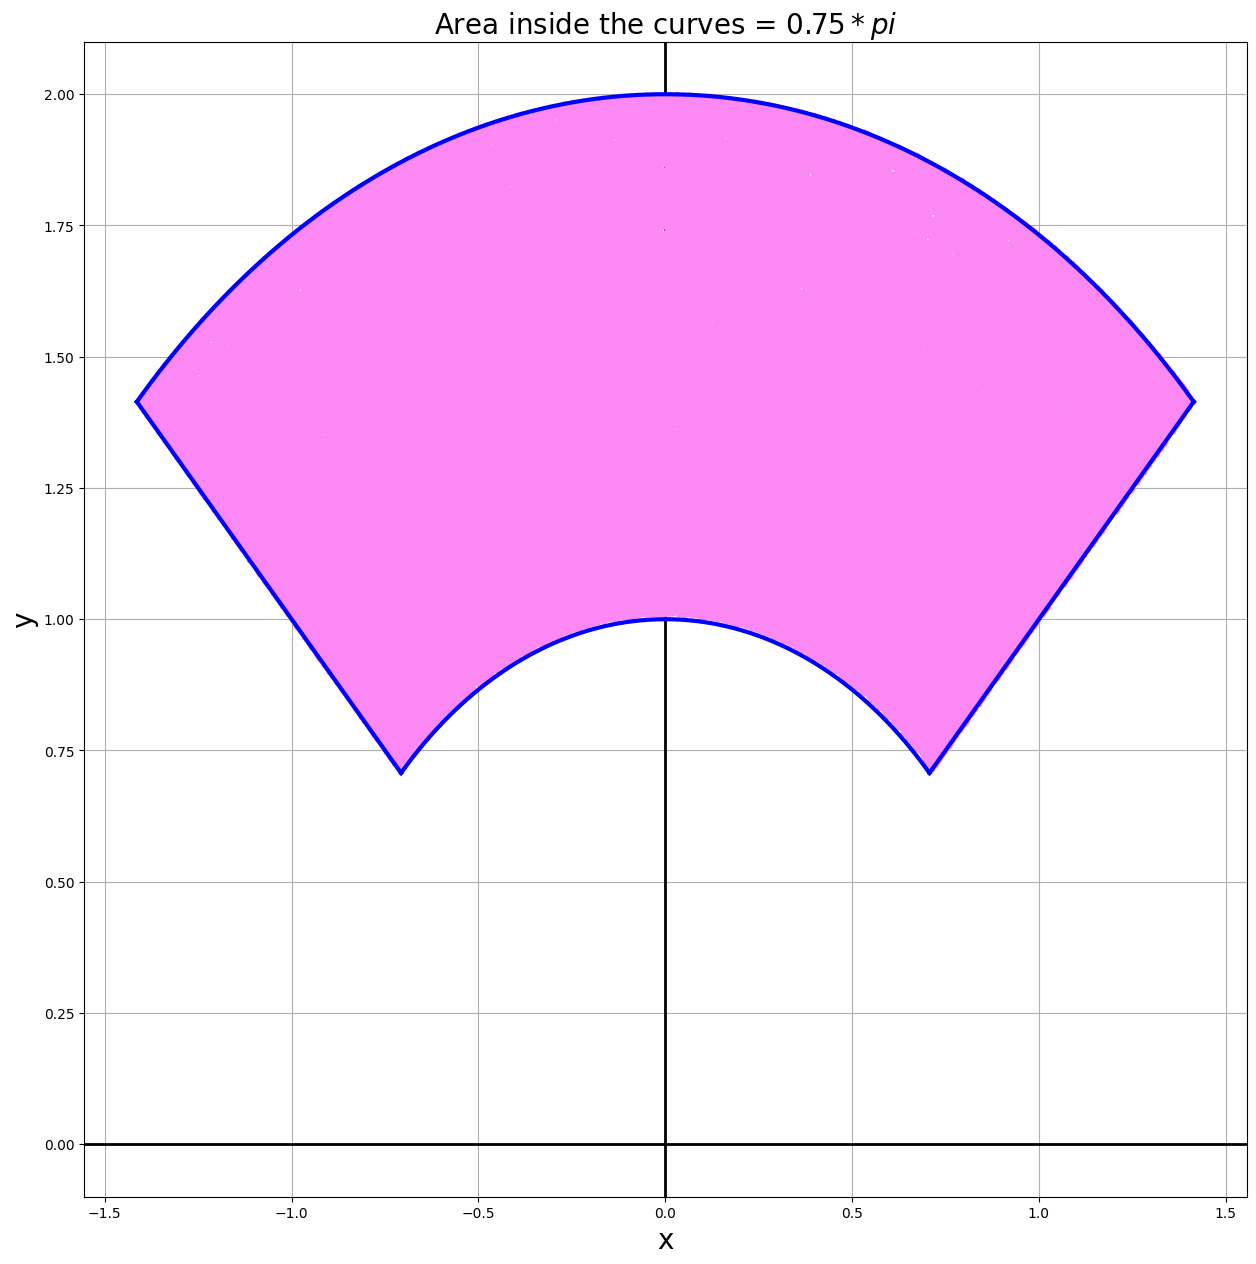

In [6]:
# УПРАЖНЕНИЕ С3
plt.figure(figsize=(15,15))
plt.axhline(y=0, color="k", linewidth=2)
plt.axvline(x=0, color="k", linewidth=2)
plt.grid()
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)

phi = np.linspace(np.pi/4, 3* np.pi/4, 200_000)
x, y = np.cos(phi), np.sin(phi)
r = 2 - 0.99*np.random.rand(200_000)
plt.plot(r*x, r*y, '.', color='#fc88f3')

phi = np.linspace(np.pi/4, 3* np.pi/4, 1000)
x, y = np.cos(phi), np.sin(phi)
r_1, r_2 = 2, 1

plt.plot(r_2 * x,r_2 * y, linewidth=3, color="blue")
plt.plot(r_1 * x,r_1 * y, linewidth=3, color="blue")
x = np.linspace(np.cos(np.pi/4), 2 * np.cos(np.pi/4), 1000)
plt.plot( x, x, linewidth=3, color="blue")
plt.plot(-x, x, linewidth=3, color="blue")

phi = sp.symbols('phi')
AREA = 0.5 * sp.integrate((r_1**2 - r_2**2), (phi, sp.pi/4, 3*sp.pi/4))
plt.title(f"Area inside the curves = ${AREA}$", fontsize=20)

# S = 1/2 * integral( [phi_1 -> phi_2] | r_1^2 - r_2^2 dphi )

Text(0, 0.5, 'y')

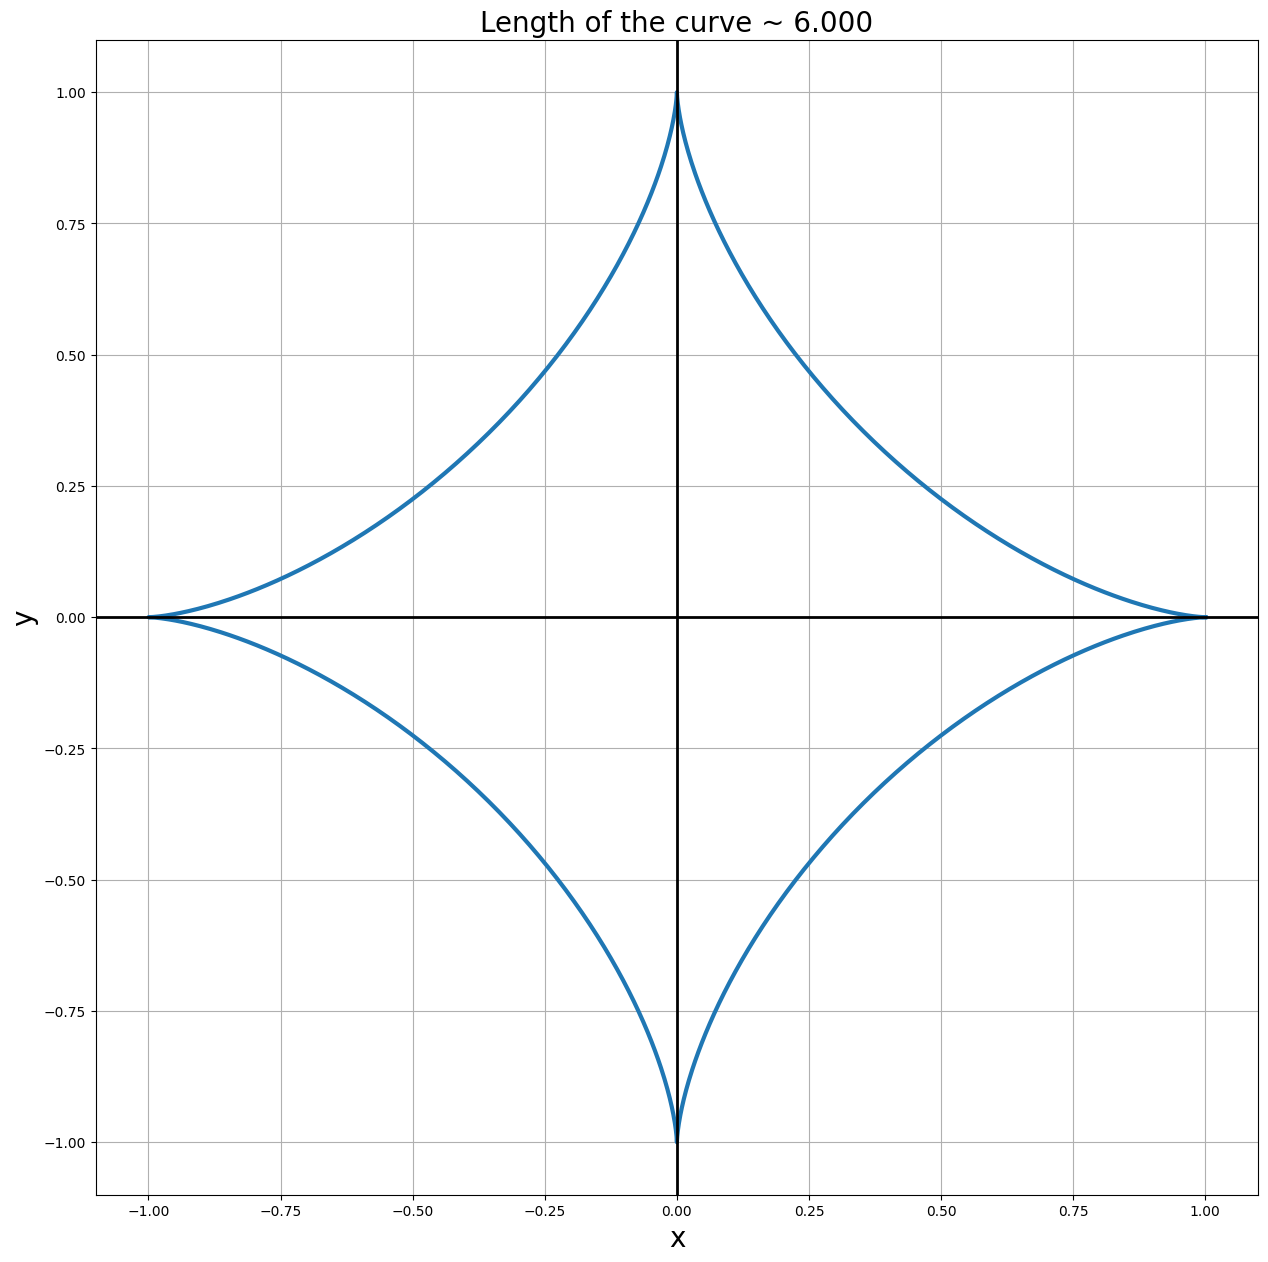

In [137]:
# УПРАЖНЕНИЕ С4
t = np.linspace(0, 2*np.pi, 1000)
x = (np.cos(t))**3
y = (np.sin(t))**3
dx_dt = np.gradient(x,t)
dy_dt = np.gradient(y,t)
L = integrate_sc.simpson(np.sqrt(dx_dt**2 + dy_dt**2), t)

plt.figure(figsize=(15,15))
plt.plot(x,y, linewidth=3)
plt.grid()
plt.axhline(y=0, color="k", linewidth=2)
plt.axvline(x=0, color="k", linewidth=2)
plt.title(f"Length of the curve ~ {L:.3f}", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)

# S = integral( [t_1 -> t_2] | y(t) * x'(t) dt )